In [14]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd

def fahrtocel(f):
  c = (f-32)/1.8
  return c

year = 2019

pd.set_option('display.width', 85)
pd.set_option('display.max_columns',10)

Capetown = pd.read_csv('https://academic.udayton.edu/kissock/http/Weather/gsod95-current/ZACAPTWN.txt', names = ['Month', 'Day', 'Year', 'Temperatur'], delim_whitespace= True)
Seoul = pd.read_csv('https://academic.udayton.edu/kissock/http/Weather/gsod95-current/KOSEOUL.txt', names = ['Month', 'Day', 'Year', 'Temperatur'], delim_whitespace= True)
dates = pd.to_datetime(Capetown[['Day','Month','Year']], format = '%y-%m-%d').dt.strftime('%d.%m')
dfCapetown = Capetown.assign(Date=dates)
dfCapetown = dfCapetown[dfCapetown['Year'] == year]
dfCapetown = dfCapetown[dfCapetown['Temperatur'] >= 0]

dates = pd.to_datetime(Seoul[['Day','Month','Year']], format = '%y-%m-%d').dt.strftime('%d.%m')
dfSeoul = Seoul.assign(Date=dates)
dfSeoul = dfSeoul[dfSeoul['Year'] == year]
dfSeoul = dfSeoul[dfSeoul['Temperatur'] >= 0]

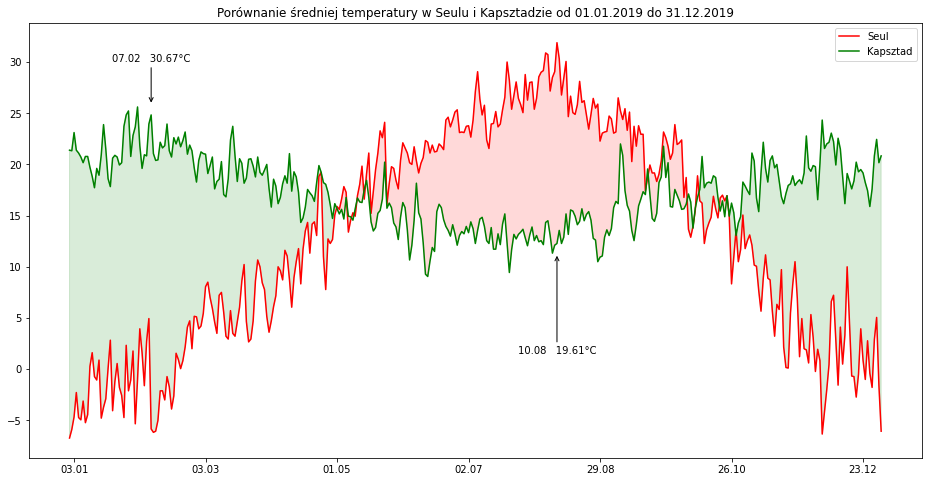

<Figure size 432x288 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,8))

sDates = dfSeoul["Date"].to_list()
cDates = dfCapetown["Date"].to_list() 
sTemp = dfSeoul["Temperatur"].to_list()
cTemp = dfCapetown["Temperatur"].to_list()

Celc_Seoul = []
for i in range(len(sTemp)):
  Celc_Seoul.append(fahrtocel(sTemp[i]))

Celc_Cape = []
for i in range(len(cTemp)):
  Celc_Cape.append(fahrtocel(cTemp[i]))

ticks = []
for i in range(len(sDates)):
  if i % 58 == 2:
    ticks.append(sDates[i])

celcCape = np.array(Celc_Cape)
celcSeoul = np.array(Celc_Seoul)

diff = []
for i in range(len(Celc_Cape)):
  diff.append(Celc_Seoul[i] - Celc_Cape[i])

maxdiff = 0
mindiff = 0
maxpos = 0
minpos = 0
for i in range(len(diff)):
  if diff[i] > maxdiff:
    maxdiff = diff[i]
    maxpos = i
  if diff[i] < mindiff:
    mindiff = diff[i]
    minpos = i
maxtick = sDates[maxpos]
mintick = sDates[minpos]

ax.plot(sDates, celcSeoul, color = "red", label = "Seul")
ax.plot(cDates, celcCape, color = "green", label = "Kapsztad")
ax.set_title("Porównanie średniej temperatury w Seulu i Kapsztadzie od " + sDates[0] + "." + str(year) + " do " + sDates[-1] + "." + str(year))
ax.annotate(maxtick + "   " + str(round(maxdiff,2)) + "°C",
            xy = (maxtick,Celc_Cape[maxpos]-1), 
            xytext = (maxtick,Celc_Cape[maxpos]-10),
            arrowprops=dict(arrowstyle='->', facecolor = 'gray'), 
            horizontalalignment = 'center', 
            verticalalignment = 'top')
ax.annotate(mintick + "   " + str(round(-mindiff,2)) + "°C",
            xy = (mintick,Celc_Cape[minpos]+1), 
            xytext = (mintick,Celc_Cape[minpos]+5),
            arrowprops=dict(arrowstyle='->', facecolor = 'gray'), 
            horizontalalignment = 'center', 
            verticalalignment = 'bottom')
ax.set_xticks(ticks)

ax.fill_between(
    sDates,celcCape,celcSeoul, where=(celcSeoul > celcCape),
    interpolate = True, color = "red", alpha = 0.15)

ax.fill_between(
    cDates,celcCape,celcSeoul, where=(celcSeoul <= celcCape),
    interpolate = True, color = "green", alpha = 0.15)

ax.legend()
plt.show()
plt.savefig("07_lew_275116.png")